# September_2023_L3_C1_S4_Challenge

In [1]:
import numpy as np #for numerical calculatoin
import pandas as pd # for data analysis
import matplotlib.pyplot as plt #for data visualication
import seaborn as sb # data visual
import warnings #to ignore warning
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error # to calculate error value

from statsmodels.tsa.seasonal import seasonal_decompose # to view data trend,seasonal and residual
from statsmodels.tsa.arima.model import ARIMA #to build ARIMA model
from statsmodels.tsa.api import adfuller,pacf,acf # to check stationarity of data

import statsmodels.api as sm # to build sarima model

from statsmodels.tsa.ar_model import AutoReg 
from pmdarima.arima import auto_arima #to view best model

In [2]:
df = pd.read_csv('DS3_C1_S4_SuperstoreSales_Data_Challenge.csv',parse_dates=['Order Date'],index_col=['Order Date'])
df.head() #importing data set with data index

,Row ID,Order ID,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,
2016-11-08,1,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
2016-11-08,2,CA-2016-152156,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2015-10-11,4,US-2015-108966,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
2014-06-09,6,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
2014-06-09,11,CA-2014-115812,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092


2.perform data analysis to determine whether the data is  ready for time series analysis

In [3]:
x=df[['Sales']]
x # data is not in order

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775
2014-06-09,48.8600
2014-06-09,1706.1840
...,...
2015-03-19,383.4656
2016-12-05,13.4000
2015-09-06,85.9800


In [4]:
x.sort_index(ascending=True,inplace = True)

In [5]:
x.head(20) # now data is in order

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
2014-01-13,333.999
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470


In [6]:
data = x.resample('M').mean() # data in month vise

3.Perform some visual inspection of the data

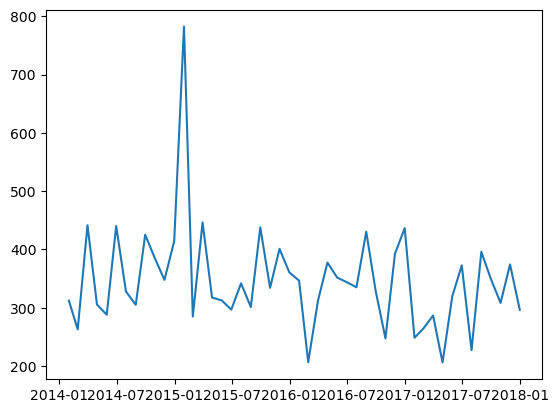

In [7]:
plt.plot(data) # ploting

4.Accomplish the decomposition of data

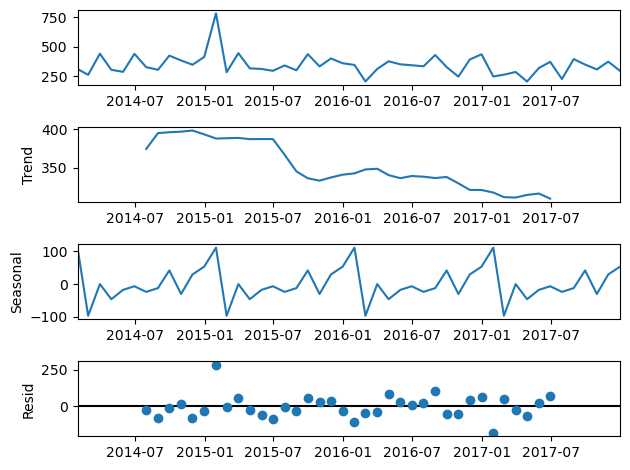

In [8]:
seasonal_decompose(data).plot(); # to view data decomposition

# Task 2

1.Check data for Stationarity

In [9]:
def check_stationarity(data): # to check the stationarity of the data
    pvalue = adfuller(data['Sales'])[1]
    print("P_value= {}".format(pvalue))
    
    if pvalue < 0.05:
        msg = ('Data is Stationarity Best for model Building')
    else:
        msg = ('Data is not Staionarity Make the data Stationarity before model building')
    return msg

In [10]:
check_stationarity(data)

P_value= 9.093398510006677e-10


'Data is Stationarity Best for model Building'

2. plot ACF and PACF

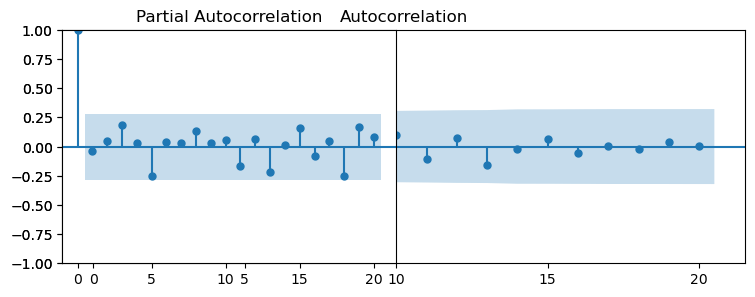

In [11]:
fig = plt.figure(figsize= (8,6)) # to see p and q lag value

ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(data,lags = 20,ax = ax1)

ax2 = fig.add_subplot(221)
sm.graphics.tsa.plot_pacf(data,lags=20,ax = ax2)
plt.tight_layout()

# Task 4

1) Build Arima model

In [12]:
arma1= ARIMA(data,order=(1,0,1)).fit()
arma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.479
Date:                Thu, 14 Sep 2023   AIC                            574.958
Time:                        12:32:09   BIC                            582.443
Sample:                    01-31-2014   HQIC                           577.786
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.5093     17.190     20.158      0.000     312.818     380.201
ar.L1         -0.1612      4.249     -0.038      0.970      -8.489       8.166
ma.L1          0.1209      4.304      0.028      0.978      -8.315       8.557
sigma2      7892.2331   1178.230      6.698      0.000    5582.944    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               244.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             2.33
Prob(H) (two-sided):                  0.04   Kurtosis:                        13.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arma2 = ARIMA(data, order = (2,0,1)).fit()
arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -283.247
Date:                Thu, 14 Sep 2023   AIC                            576.494
Time:                        12:32:10   BIC                            585.850
Sample:                    01-31-2014   HQIC                           580.030
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.3086     19.762     17.524      0.000     307.577     385.041
ar.L1          0.4609      1.893      0.243      0.808      -3.249       4.171
ar.L2          0.1035      0.223      0.465      0.642      -0.333       0.540
ma.L1         -0.5006      1.881     -0.266      0.790      -4.187       3.186
sigma2      7809.4563   1221.254      6.395      0.000    5415.842    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               239.99
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             2.32
Prob(H) (two-sided):                  0.04   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
arma3 = ARIMA(data, order=(2,0,2)).fit()
arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -283.247
Date:                Thu, 14 Sep 2023   AIC                            576.494
Time:                        12:32:10   BIC                            585.850
Sample:                    01-31-2014   HQIC                           580.030
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.3086     19.762     17.524      0.000     307.577     385.041
ar.L1          0.4609      1.893      0.243      0.808      -3.249       4.171
ar.L2          0.1035      0.223      0.465      0.642      -0.333       0.540
ma.L1         -0.5006      1.881     -0.266      0.790      -4.187       3.186
sigma2      7809.4563   1221.254      6.395      0.000    5415.842    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               239.99
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             2.32
Prob(H) (two-sided):                  0.04   Kurtosis:                        12.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Interpretation:
AIC score of ARMA(1) model is 574.958

AIC score of ARMA(2) model is 576.494

AIC score of ARMA(3) model is 576.494

Lesser the AIC score is better the model. Hence ARMA(1) is the better model

In [15]:
ss = int(0.7 * len(data))
train = data.iloc[:ss]
test = data.iloc[ss:]
print("train = {} , test = {}".format(len(train),len(test)))

train = 33 , test = 15


2) Summarize the ARIMA model

In [16]:
m1 = ARIMA(data['Sales'],order=(1,0,1)).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -283.479
Date:                Thu, 14 Sep 2023   AIC                            574.958
Time:                        12:32:10   BIC                            582.443
Sample:                    01-31-2014   HQIC                           577.786
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        346.5093     17.190     20.158      0.000     312.818     380.201
ar.L1         -0.1612      4.249     -0.038      0.970      -8.489       8.166
ma.L1          0.1209      4.304      0.028      0.978      -8.315       8.557
sigma2      7892.2331   1178.230      6.698      0.000    5582.944    1.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               244.39
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             2.33
Prob(H) (two-sided):                  0.04   Kurtosis:                        13.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

3) Forecast using model

In [17]:
fcast = m1.predict(start = len(data),end =len(data)+11,typ = 'levels')
fcast

2018-01-31    348.691010
2018-02-28    346.157596
2018-03-31    346.566006
2018-04-30    346.500166
2018-05-31    346.510780
2018-06-30    346.509069
2018-07-31    346.509345
2018-08-31    346.509300
2018-09-30    346.509308
2018-10-31    346.509306
2018-11-30    346.509307
2018-12-31    346.509307
Freq: M, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Order Date'>

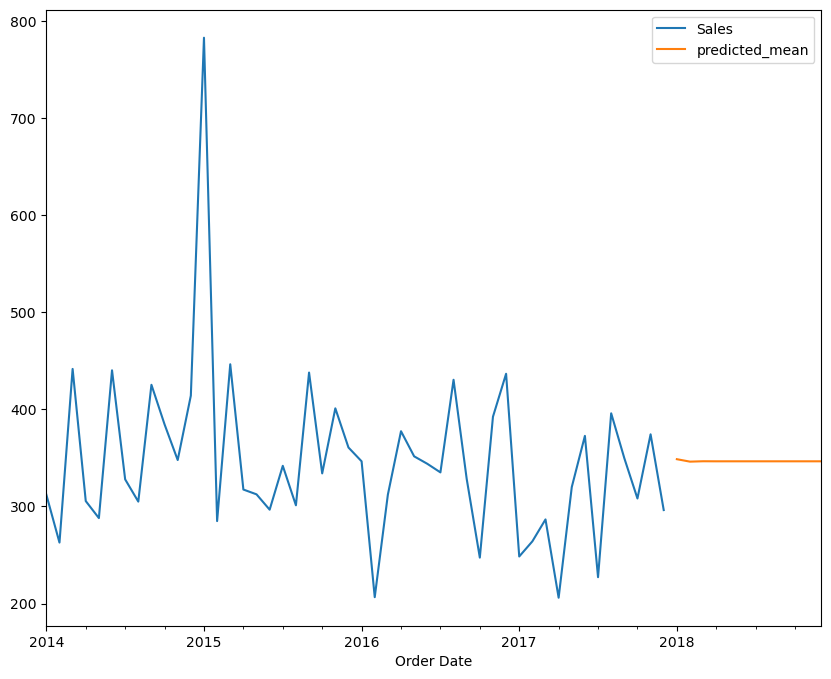

In [18]:
data['Sales'].plot(figsize=(10,8), legend= True)
fcast.plot(legend=True)


# Task 5 

1)Build the SARIMA model

In [20]:
p=1;d=1;q=1
sm1= sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
sm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -216.017
Date:                            Thu, 14 Sep 2023   AIC                            442.033
Time:                                    12:37:51   BIC                            449.810
Sample:                                01-31-2014   HQIC                           444.718
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0284      0.259     -0.110      0.913      -0.537       0.480
ma.L1         -0.9991     31.355     -0.032      0.975     -62.453      60.455
ar.S.L12      -0.0455      0.345     -0.132      0.895      -0.722       0.631
ma.S.L12      -0.9984    303.544     -0.003      0.997    -595.933     593.936
sigma2      7326.7989   2.25e+06      0.003      0.997   -4.41e+06    4.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.39   Prob(JB):                         0.61
Heteroskedasticity (H):               0.44   Skew:                            -0.36
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
p,d,q=(2,1,1)
sm2=sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_decompose=(p,d,q,12)).fit()
sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   48
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -279.706
Date:                Thu, 14 Sep 2023   AIC                            567.412
Time:                        12:40:00   BIC                            574.812
Sample:                    01-31-2014   HQIC                           570.196
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0651      0.202     -0.322      0.747      -0.461       0.331
ar.L2          0.0135      0.258      0.052      0.958      -0.493       0.520
ma.L1         -0.9234      0.130     -7.104      0.000      -1.178      -0.669
sigma2      8277.4464    917.205      9.025      0.000    6479.758    1.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               161.29
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                             2.05
Prob(H) (two-sided):                  0.04   Kurtosis:                        11.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
p,d,q=(3,2,1)
sm3=sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
sm3.summary()

C:\Users\prabh\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(3, 2, 1)x(3, 2, 1, 12)   Log Likelihood                -147.142
Date:                            Thu, 14 Sep 2023   AIC                            312.284
Time:                                    12:41:25   BIC                            322.103
Sample:                                01-31-2014   HQIC                           314.597
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7019      0.432     -1.625      0.104      -1.548       0.145
ar.L2         -0.3932      0.510     -0.770      0.441      -1.394       0.607
ar.L3         -0.1675      0.438     -0.382      0.702      -1.026       0.691
ma.L1         -0.8476      0.489     -1.733      0.083      -1.806       0.111
ar.S.L12      -2.1196      8.511     -0.249      0.803     -18.801      14.562
ar.S.L24      -2.0779      6.990     -0.297      0.766     -15.777      11.622
ar.S.L36      -0.9582      3.764     -0.255      0.799      -8.335       6.419
ma.S.L12       0.9982     61.937      0.016      0.987    -120.397     122.393
sigma2      3123.4644      0.023   1.34e+05      0.000    3123.419    3123.510
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.38   Prob(JB):                         0.90
Heteroskedasticity (H):               0.22   Skew:                             0.19
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.58e+22. Standard errors may be unstable.
"""

# Interpretion
AIC score of SARIMA(1) model is 442.033

AIC score of SARIMA(2) model is 567.412

AIC score of SARIMA(3) model is 312.284

Lesser the AIC score is better the model. Hence SARIMA(3) is the better model.

In [25]:
print("Train = {}, Test ={}".format(len(train),len(test)))

Train = 33, Test =15


In [26]:
start=len(train)
end=len(train) + len(test)-1
print('start={}, end={}'.format(start,end))

start=33, end=47


In [27]:
prediction2= sm3.predict(start,end,typ='levels')
prediction2.head()

Order Date
2016-10-31    408.672959
2016-11-30    459.723972
2016-12-31    275.174208
2017-01-31    312.953399
2017-02-28     69.450035
Freq: M, Name: predicted_mean, dtype: float64

3)Forecast using model

In [35]:
forecast = sm3.predict(start = len(data), end = len(data)+12, typ='levls')
forecast

2018-01-31    312.692027
2018-02-28     -2.077604
2018-03-31     63.798477
2018-04-30     99.875451
2018-05-31    266.634866
2018-06-30    212.857359
2018-07-31    286.113944
2018-08-31    511.737023
2018-09-30    496.189485
2018-10-31    453.647550
2018-11-30    701.684865
2018-12-31    610.460052
2019-01-31    268.400445
Freq: M, Name: predicted_mean, dtype: float64

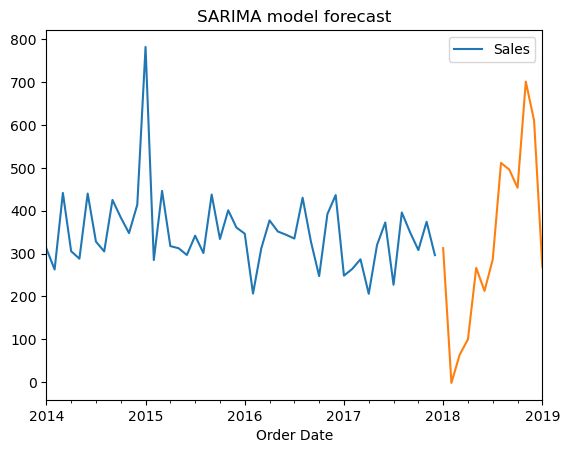

In [37]:
data.plot()
forecast.plot()
plt.title("SARIMA model forecast");

4.Write your observation about the two models you have bulit during this challange.